In [170]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
from sklearn.preprocessing import LabelEncoder

In [171]:
employee = pd.read_csv("datasets/Employee.csv")
employee

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


## № 1
Изучить данные с использованием методов info(), head(), tail(), describe(), shape()

In [172]:
employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [173]:
employee.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [174]:
employee.tail(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
4643,Bachelors,2013,Bangalore,3,31,Female,No,5,0
4644,Bachelors,2015,Pune,3,32,Female,Yes,1,1
4645,Masters,2017,Pune,2,31,Female,No,2,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0
4652,Bachelors,2015,Bangalore,3,33,Male,Yes,4,0


In [175]:
employee.describe().T

,count,mean,std,min,25%,50%,75%,max
JoiningYear,4653.0,2015.062970,1.863377,2012.0,2013.0,2015.0,2017.0,2018.0
PaymentTier,4653.0,2.698259,0.561435,1.0,3.0,3.0,3.0,3.0
Age,4653.0,29.393295,4.826087,22.0,26.0,28.0,32.0,41.0
ExperienceInCurrentDomain,4653.0,2.905652,1.558240,0.0,2.0,3.0,4.0,7.0
LeaveOrNot,4653.0,0.343864,0.475047,0.0,0.0,0.0,1.0,1.0


In [176]:
employee.shape

(4653, 9)

## № 2
Подсчитать число пропущенных значений. Принять решение, как избавиться от пропусков!

In [177]:
employee.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [178]:
for col in employee.columns:
    print(col, employee[col].unique())

Education ['Bachelors' 'Masters' 'PHD']
JoiningYear [2017 2013 2014 2016 2015 2012 2018]
City ['Bangalore' 'Pune' 'New Delhi']
PaymentTier [3 1 2]
Age [34 28 38 27 24 22 23 37 32 39 29 30 36 31 25 26 40 35 33 41]
Gender ['Male' 'Female']
EverBenched ['No' 'Yes']
ExperienceInCurrentDomain [0 3 2 5 1 4 7 6]
LeaveOrNot [0 1]


In [179]:
employee_encoded = employee.copy()

for col in employee_encoded.columns:
    l = LabelEncoder()
    l.fit(employee_encoded[col])
    employee_encoded[col] = l.transform(employee_encoded[col])
    
employee_encoded.head(10)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,5,0,2,12,1,0,0,0
1,0,1,2,0,6,0,0,3,1
2,0,2,1,2,16,0,0,2,0
3,1,4,0,2,5,1,0,5,1
4,1,5,2,2,2,1,1,2,1
5,0,4,0,2,0,1,0,0,0
6,0,3,1,2,16,1,0,0,0
7,0,4,0,2,12,0,0,2,1
8,0,4,2,2,1,1,0,1,0
9,1,5,1,1,15,1,0,2,0


34.39% сотрудников не уволены


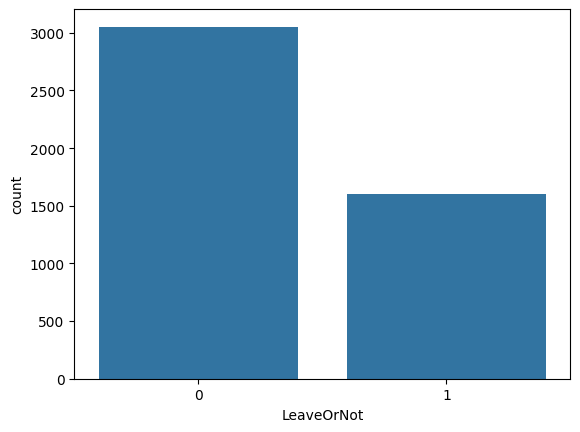

In [180]:
sns.countplot(x=employee['LeaveOrNot'])
print(f"{employee.LeaveOrNot[employee.LeaveOrNot==1].count() / employee.LeaveOrNot.count()*100:.2f}% сотрудников не уволены")

<Axes: >

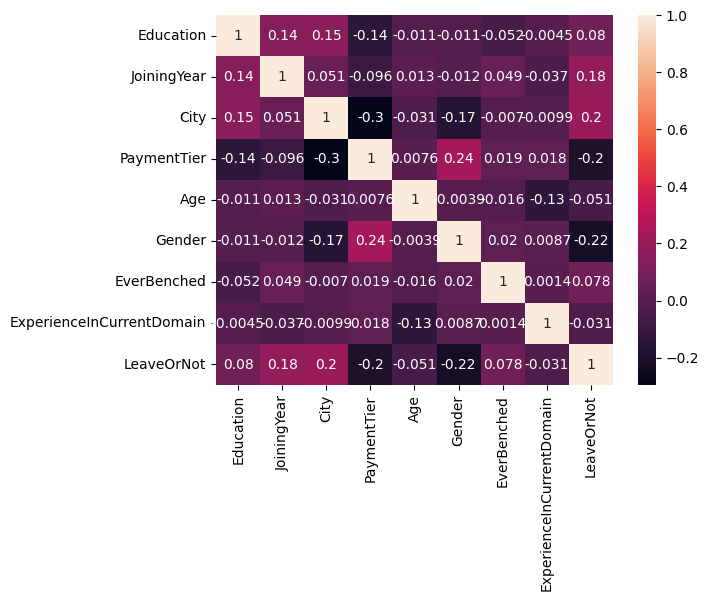

In [181]:
sns.heatmap(employee_encoded.corr(), annot=True)

<Axes: xlabel='Gender', ylabel='PaymentTier'>

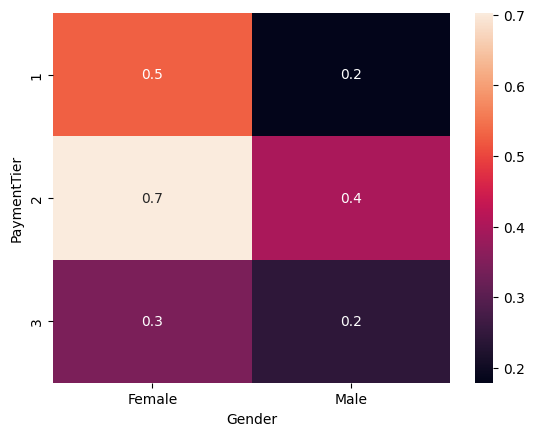

In [182]:
correlation = employee.pivot_table(
                        index='PaymentTier',
                        columns='Gender',
                        values='LeaveOrNot',
                        aggfunc='mean').fillna(0).applymap(float)
sns.heatmap(correlation, annot=True, fmt=".1f")

<Axes: xlabel='City', ylabel='PaymentTier'>

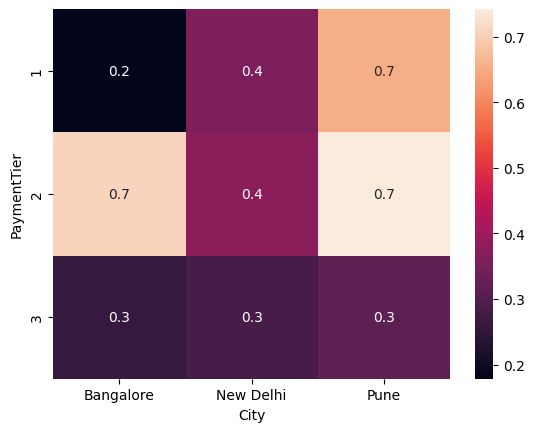

In [183]:
correlation = employee.pivot_table(
                        index='PaymentTier',
                        columns='City',
                        values='LeaveOrNot',
                        aggfunc='mean').fillna(0).applymap(float)
sns.heatmap(correlation, annot=True, fmt=".1f")

Матрица кореляции показывает что признаки мало корелируют между сабой, отсюда следует что они вполне независимы друг с другом

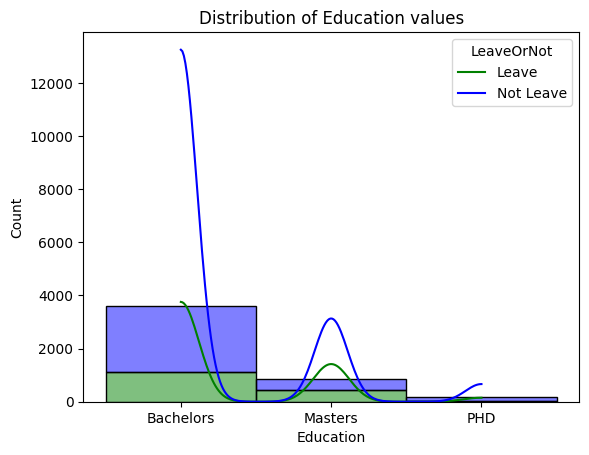

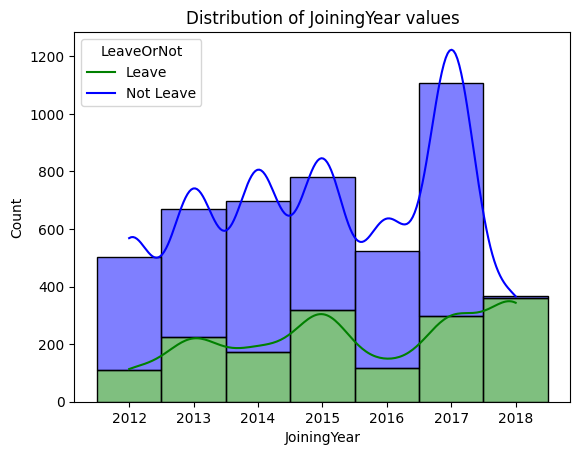

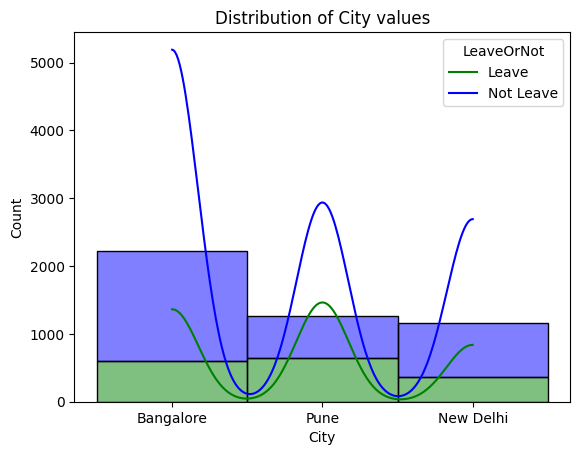

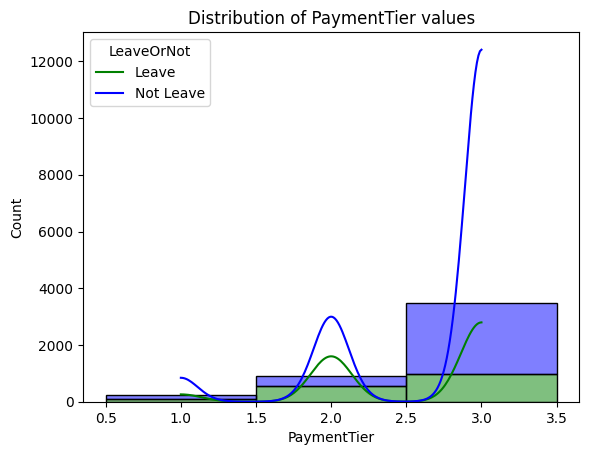

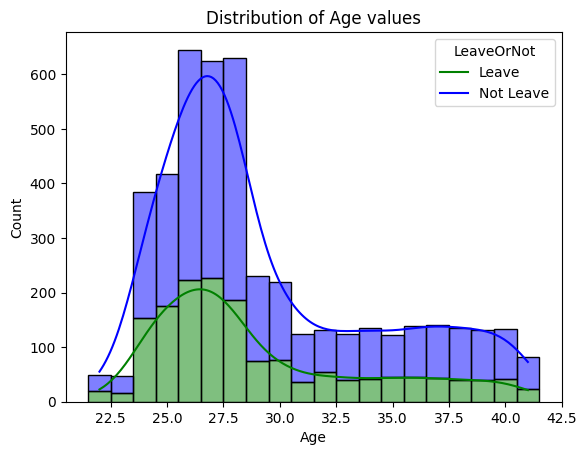

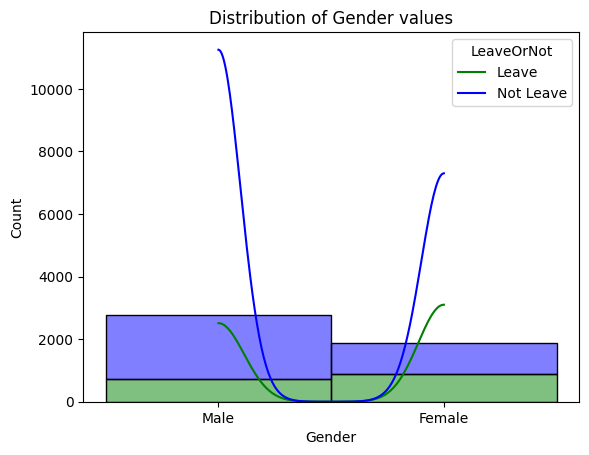

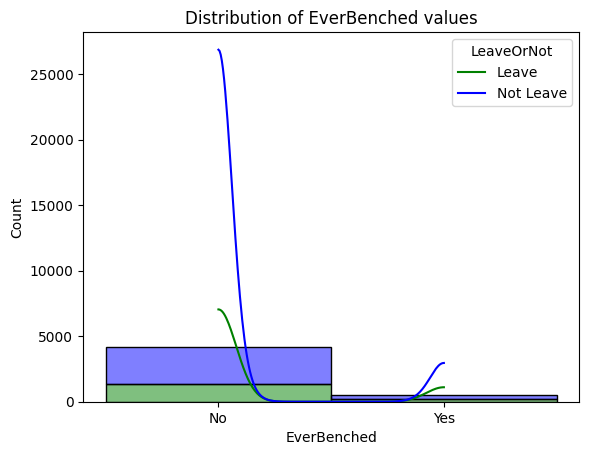

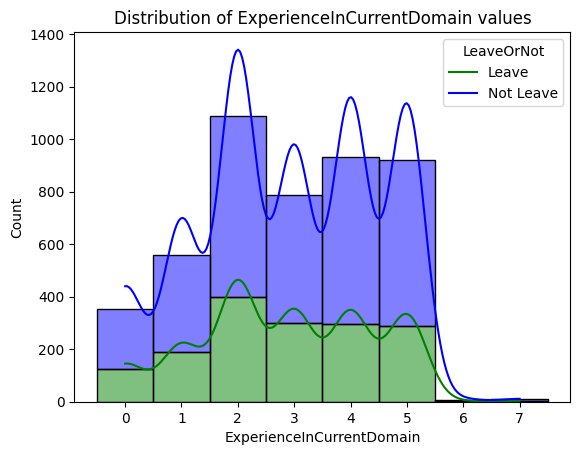

In [184]:
employee_dropped = employee.drop(columns=['LeaveOrNot'])
employee_dropped_encoded = employee_encoded.drop(columns=['LeaveOrNot'])

for i, feature in enumerate(employee_dropped.columns):
    sns.histplot(
        data=employee_dropped,
        x=employee_dropped[feature],
        hue=employee['LeaveOrNot'],
        palette=['blue', 'green'],
        kde=True,
        multiple='stack',
        discrete = True,
        alpha=0.5
    )
    plt.title(f"Distribution of {feature} values")
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='LeaveOrNot', labels=['Leave', 'Not Leave'])
    plt.show()

## № 3
Определить выбросы, дубликаты и неинформативные признаки

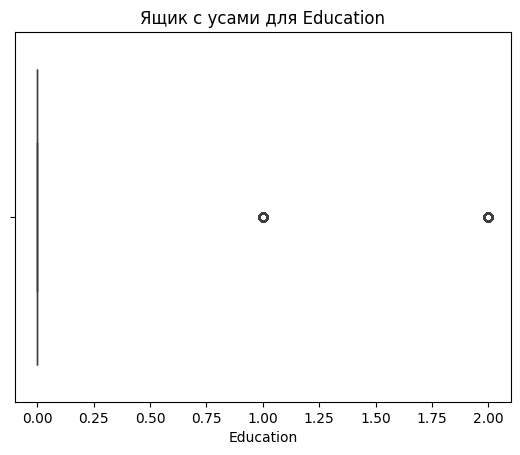

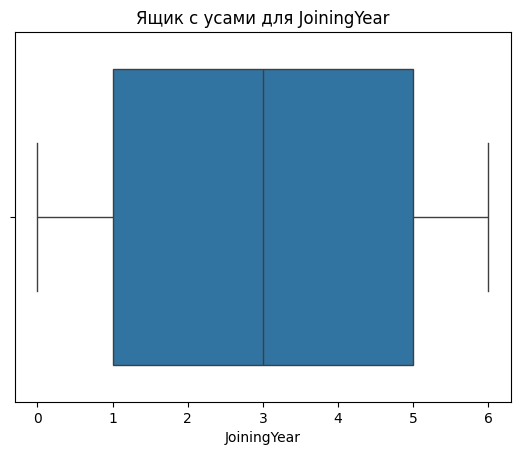

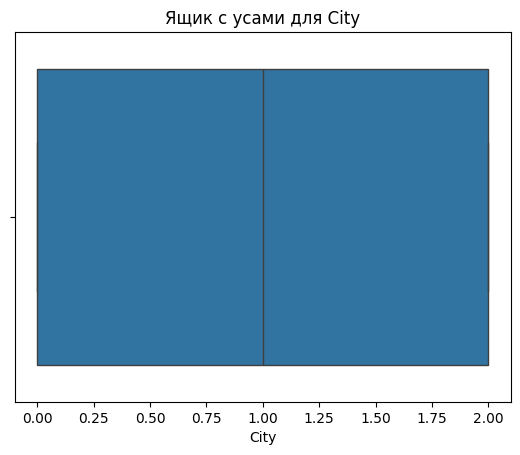

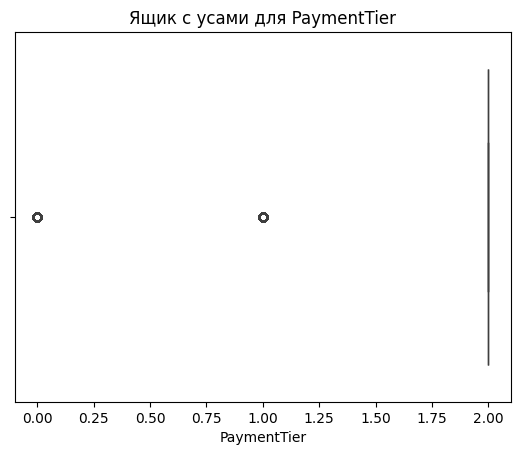

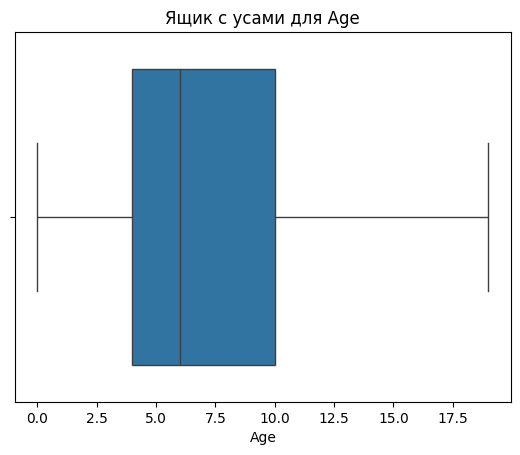

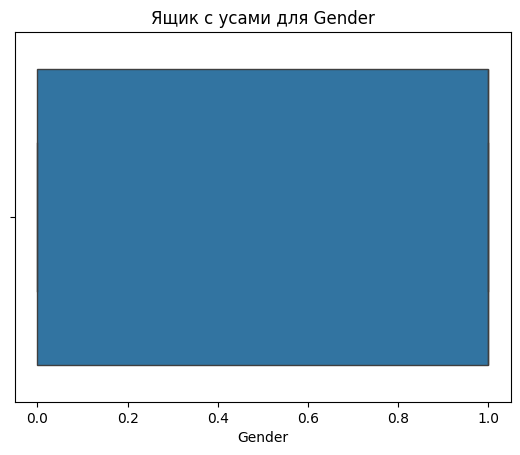

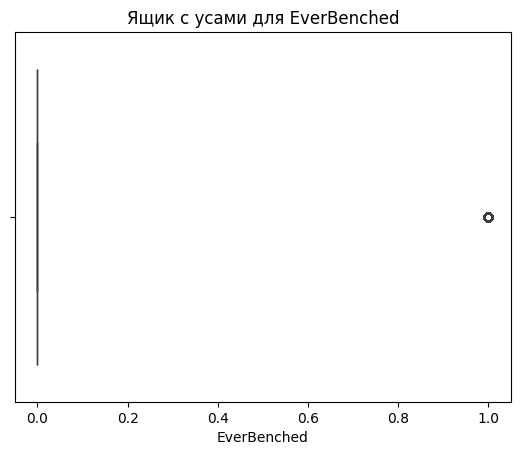

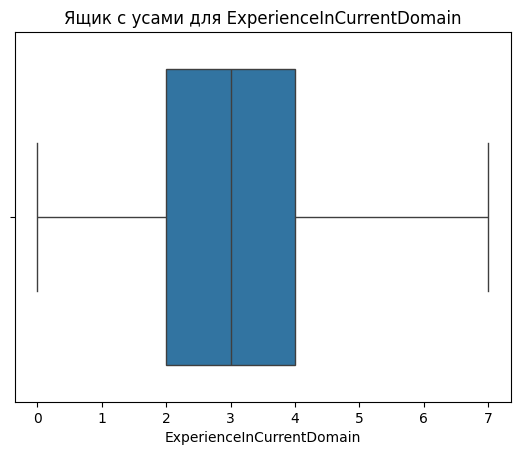

In [185]:
for column in employee_dropped_encoded.columns:
    sns.boxplot(x=employee_dropped_encoded[column])
    plt.title(f'Ящик с усами для {column}')
    plt.show()

In [186]:
# for column in employee.columns:
#     sns.histplot(employee[column], discrete = True, kde=True)
#     plt.title(f'Гистограмма для {column}')
#     plt.show()

In [187]:
duplicated = employee[employee.duplicated()]
duplicated

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
111,Bachelors,2017,Pune,2,27,Female,No,5,1
130,Bachelors,2017,Bangalore,3,26,Female,No,4,0
138,Bachelors,2017,New Delhi,3,28,Male,No,2,0
160,Bachelors,2014,Bangalore,3,28,Female,No,3,0
167,Bachelors,2014,Bangalore,3,25,Male,No,3,0
...,...,...,...,...,...,...,...,...,...
4640,Bachelors,2015,Bangalore,3,35,Male,No,0,0
4642,Bachelors,2012,Bangalore,3,36,Female,No,4,0
4646,Bachelors,2013,Bangalore,3,25,Female,No,3,0
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0


In [188]:
employee = employee.drop_duplicates()
employee_encoded = employee_encoded.drop_duplicates()
employee_encoded_dropped = employee_encoded.drop('LeaveOrNot', axis=1)
employee

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,No,2,0
4647,Bachelors,2016,Pune,3,30,Male,No,2,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1


In [189]:
for col in employee.columns:
    value_counts = employee[col].value_counts(dropna=False)
    top_pct = (value_counts / len(employee.index)).iloc[0]

    if top_pct > 0.80:
        print(f'Столбец "{col}" имеет {top_pct*100:.2f}% одинаковых значений.')

Столбец "EverBenched" имеет 86.94% одинаковых значений.


In [190]:
employee = employee.drop(columns='EverBenched')
employee_encoded = employee_encoded.drop(columns='EverBenched')
employee_encoded_dropped = employee_encoded_dropped.drop(columns='EverBenched')
employee

,Education,JoiningYear,City,PaymentTier,Age,Gender,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,0,0
1,Bachelors,2013,Pune,1,28,Female,3,1
2,Bachelors,2014,New Delhi,3,38,Female,2,0
3,Masters,2016,Bangalore,3,27,Male,5,1
4,Masters,2017,Pune,3,24,Male,2,1
...,...,...,...,...,...,...,...,...
4645,Masters,2017,Pune,2,31,Female,2,0
4647,Bachelors,2016,Pune,3,30,Male,2,0
4649,Masters,2013,Pune,2,37,Male,2,1
4650,Masters,2018,New Delhi,3,27,Male,5,1


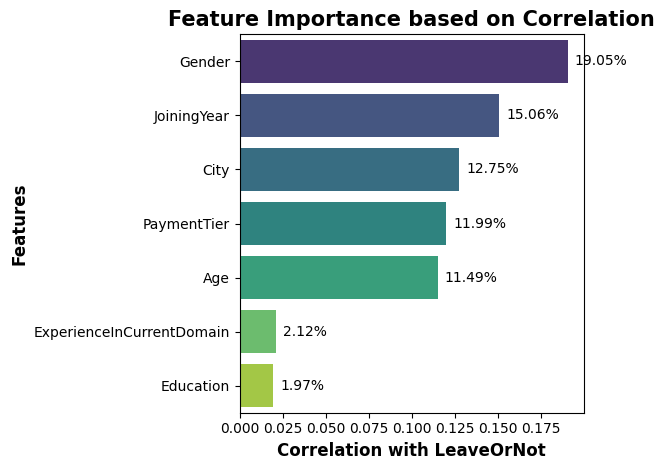

In [191]:
# Рассчитываем корреляцию между признаками и целевой переменной
correlation = employee_encoded_dropped.corrwith(employee_encoded['LeaveOrNot']).abs().sort_values(ascending=False)

# Вычисляем проценты корреляции
correlation_pct = (correlation * 100).round(2)

# Визуализируем важность признаков с гистограммой
# plt.figure(figsize=(12, 6))
ax = sns.barplot(x=correlation.values, y=correlation.index, palette='viridis')

# Добавляем проценты к столбцам гистограммы
for p, value in zip(ax.patches, correlation_pct.values):
    ax.annotate(f'{value}%', (p.get_width(), p.get_y() + p.get_height() / 2), ha='left', va='center', xytext=(5, 0), textcoords='offset points')

plt.xlabel('Correlation with LeaveOrNot', fontsize=12, weight='bold')
plt.ylabel('Features', fontsize=12, weight='bold')
plt.title('Feature Importance based on Correlation', fontsize=15, weight='bold')
plt.tight_layout()
plt.show()

## № 4
Визуализировать и проанализировать данные с целью получения информации о связи признаков. Найти признаки, влияющие на целевой.

In [192]:
# Группировка данных по целевой переменной и вычисление средних значений остальных признаков
grouped = employee_encoded.groupby('LeaveOrNot').mean()
grouped

,Education,JoiningYear,City,PaymentTier,Age,Gender,ExperienceInCurrentDomain
LeaveOrNot,,,,,,,
0,0.334129,2.861575,0.780430,1.696301,9.426014,0.629475,2.671838
1,0.357537,3.443015,0.998162,1.543199,8.224265,0.435662,2.602022


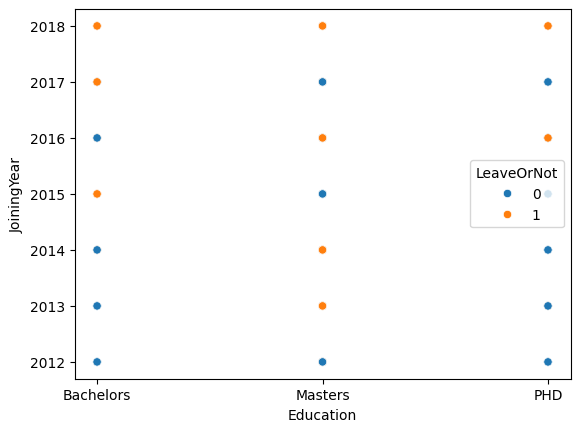

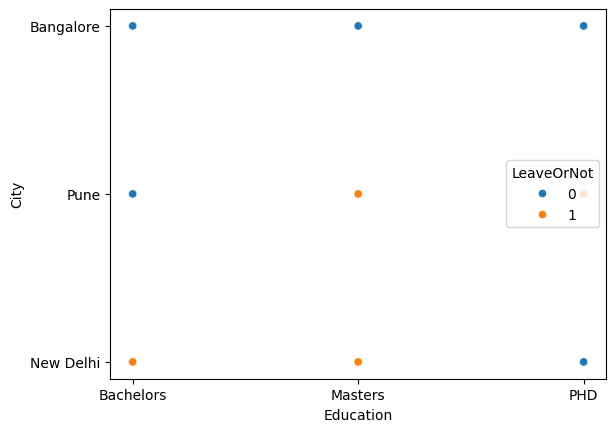

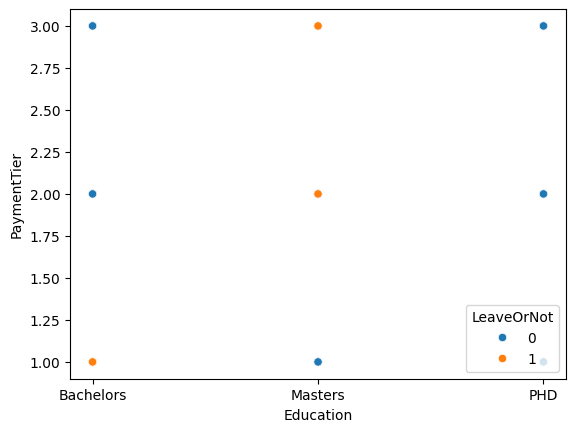

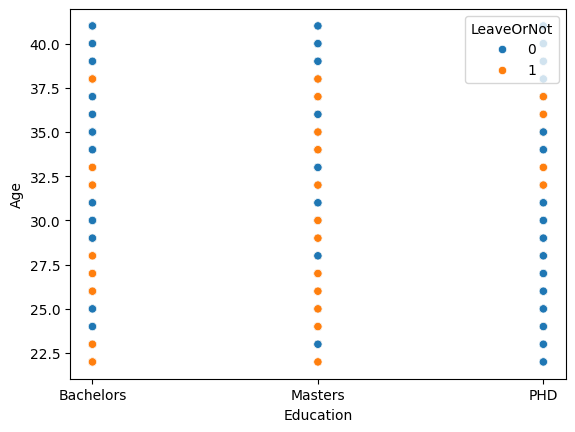

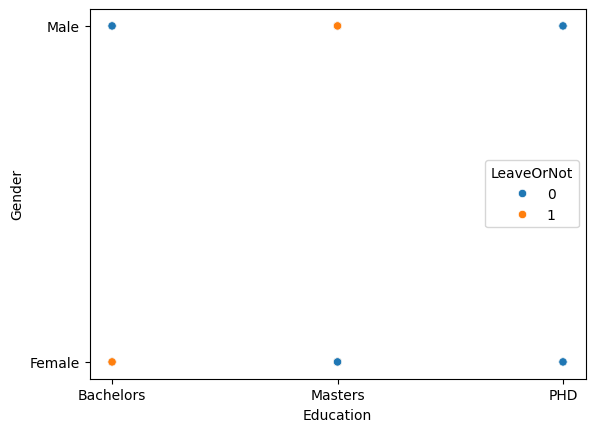

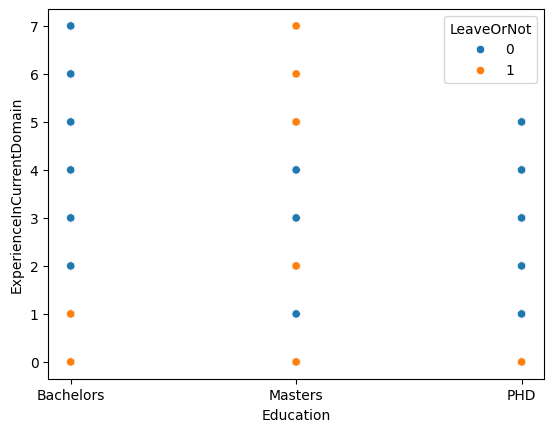

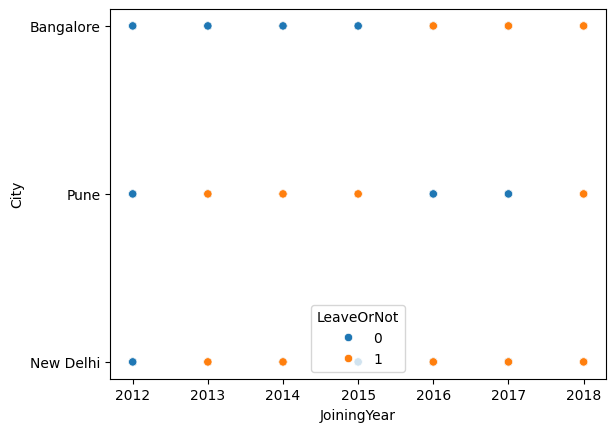

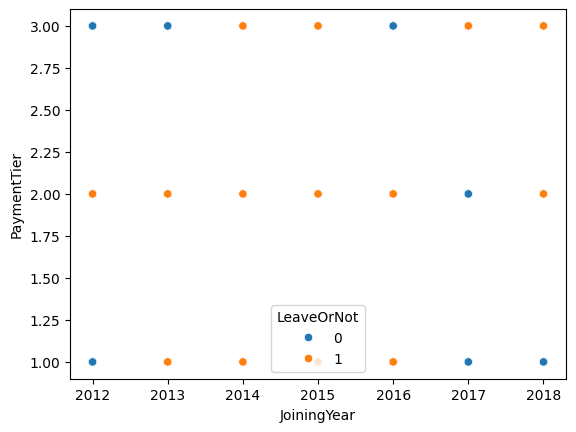

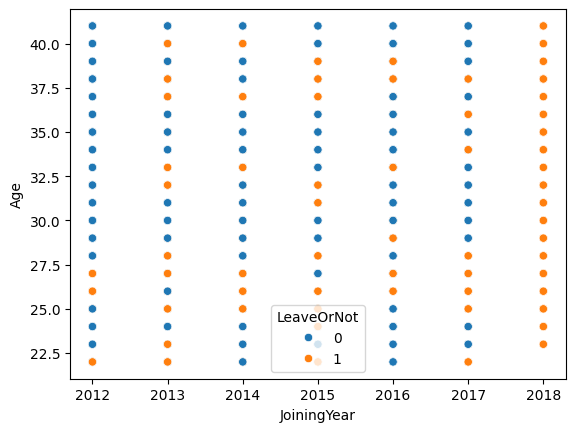

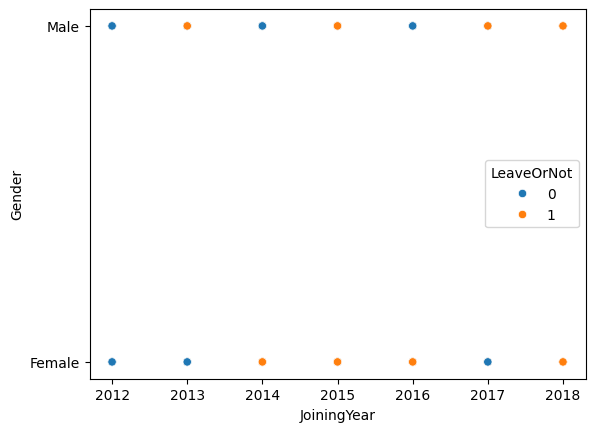

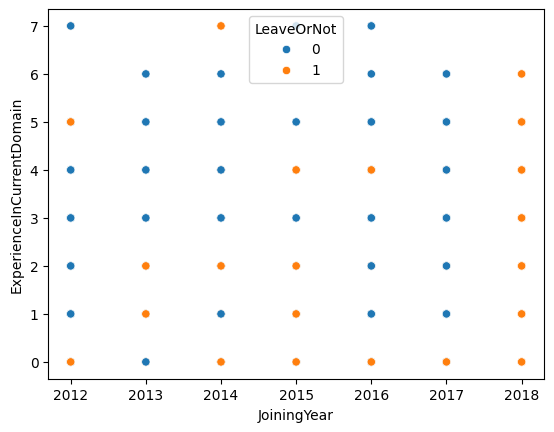

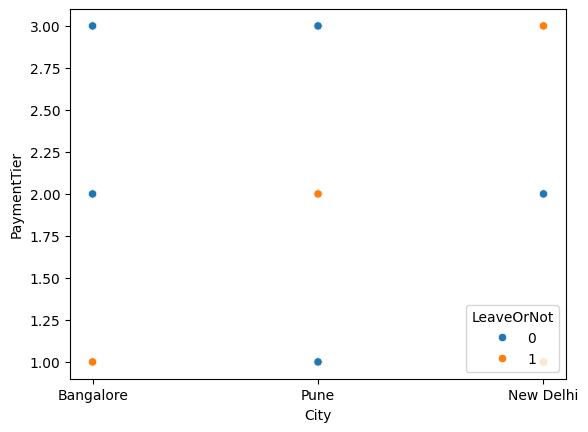

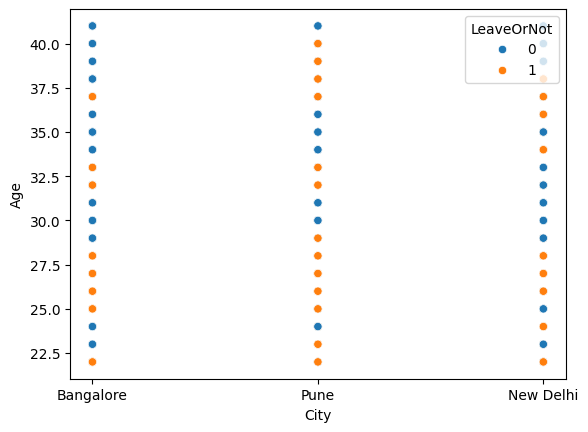

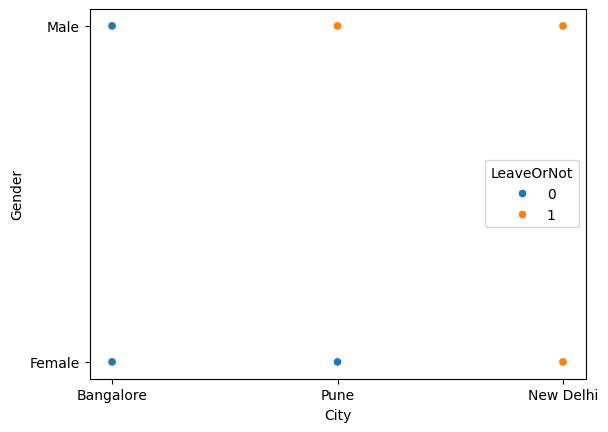

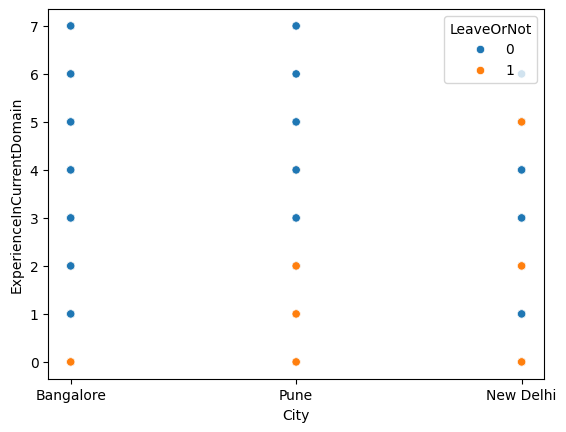

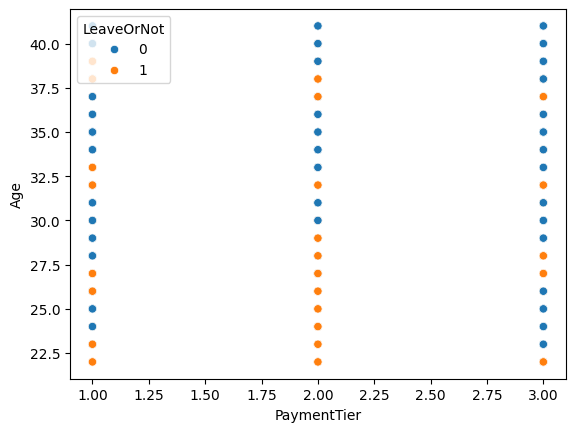

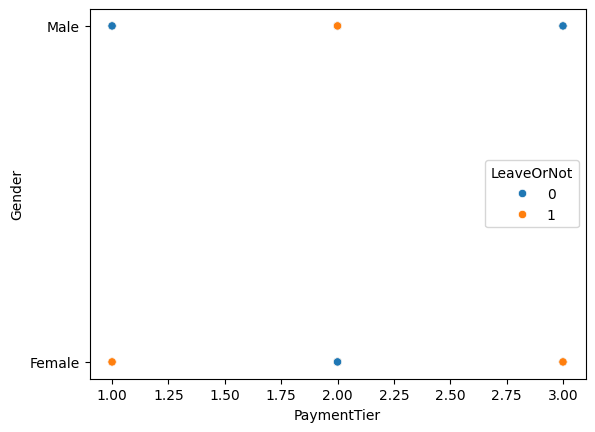

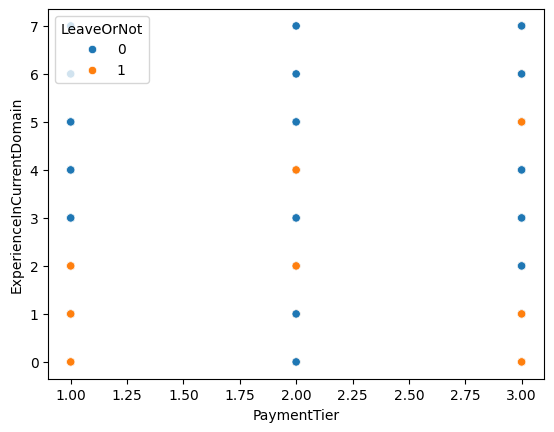

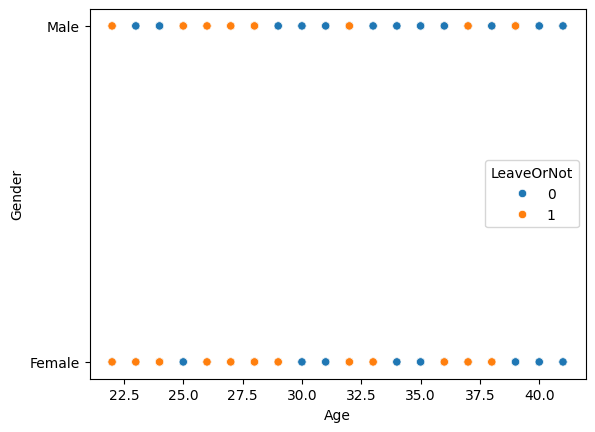

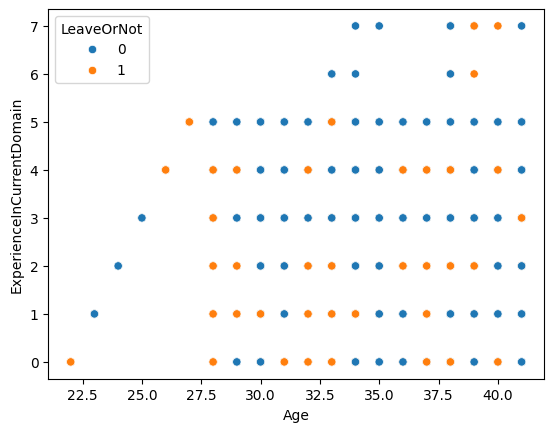

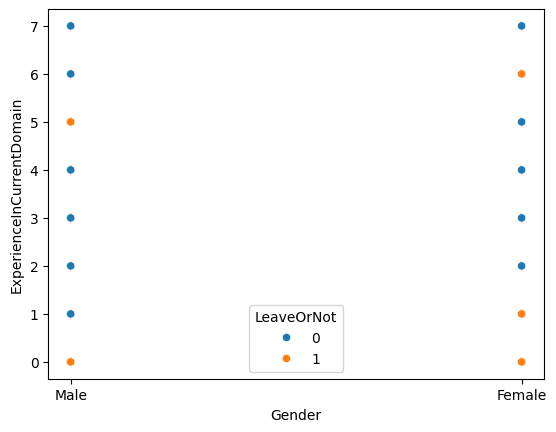

In [193]:
combinations = list(itertools.combinations(employee_encoded_dropped.columns, 2))

for feat1, feat2 in combinations:
    sns.scatterplot(x=feat1, y=feat2, data=employee, hue='LeaveOrNot')
    plt.legend(title='LeaveOrNot')
    plt.show()

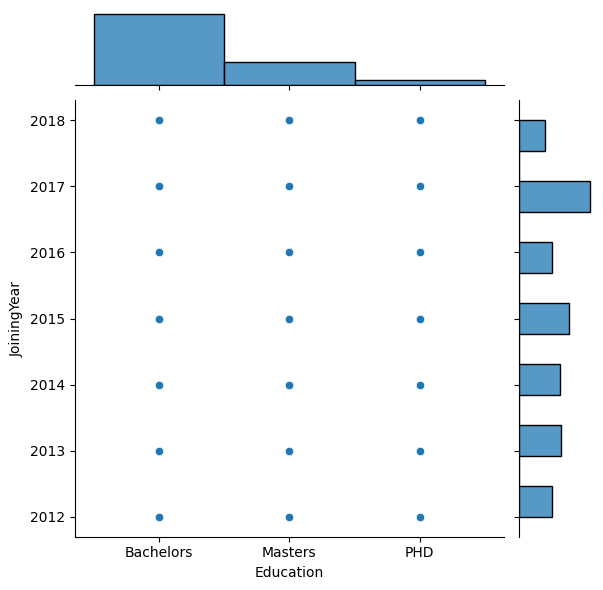

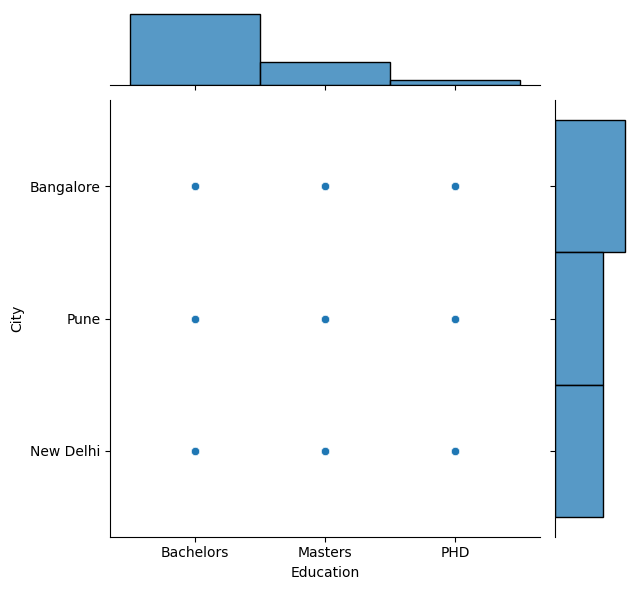

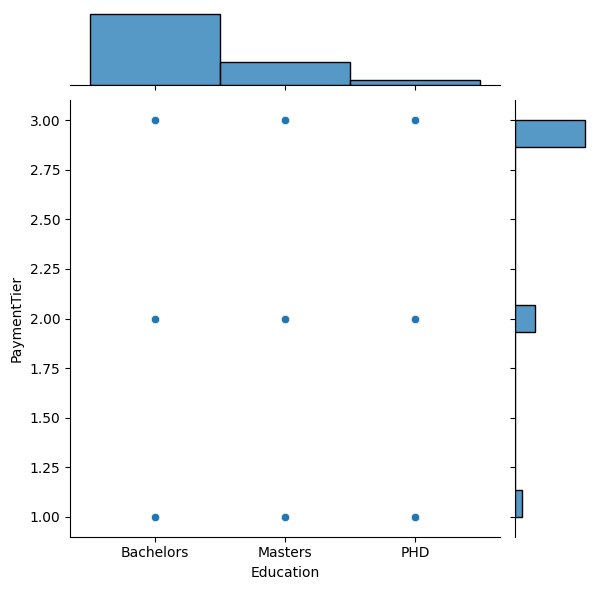

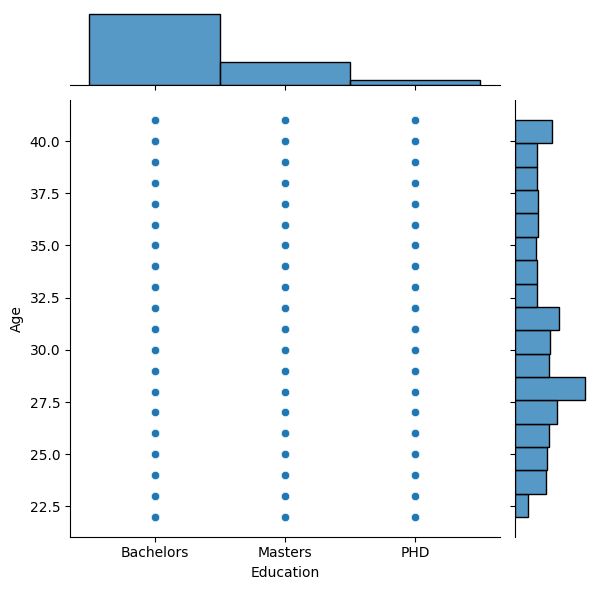

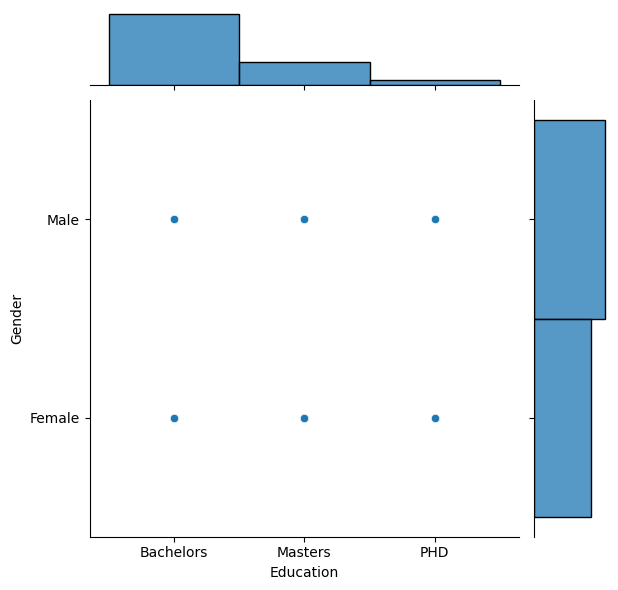

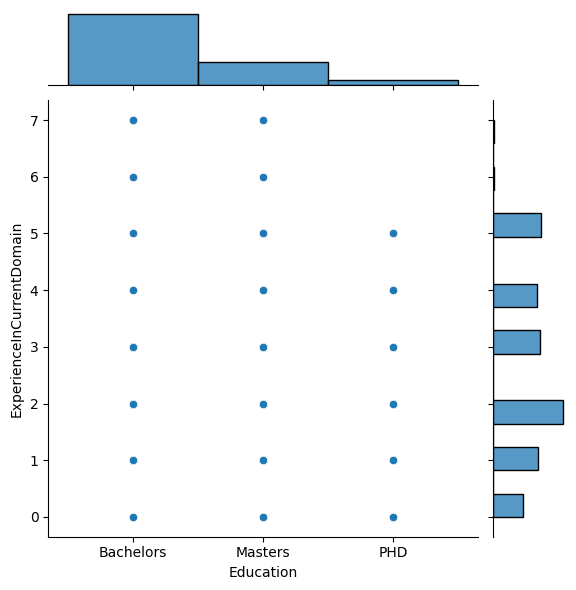

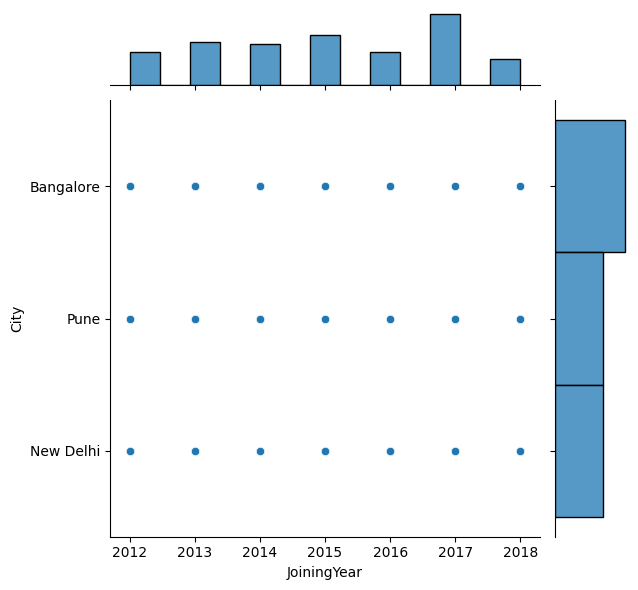

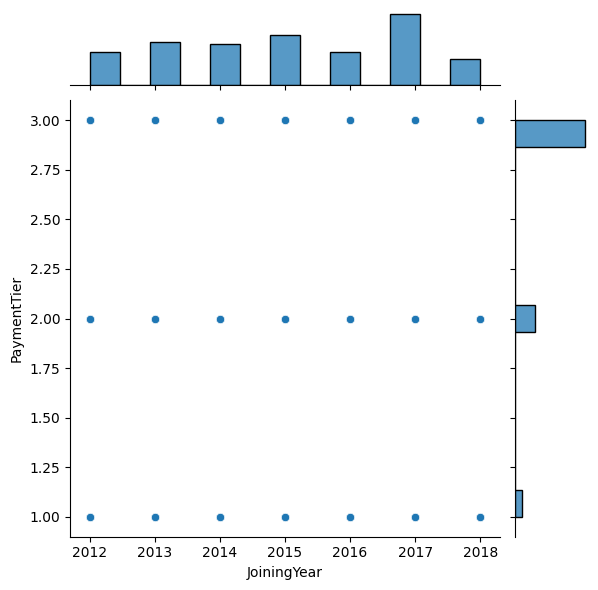

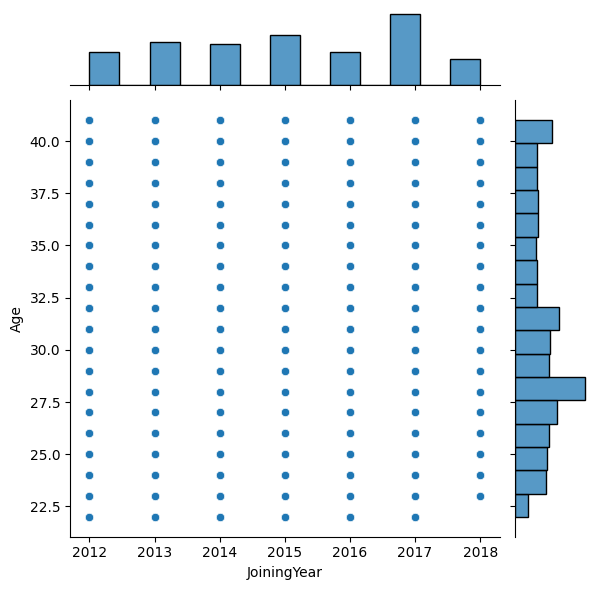

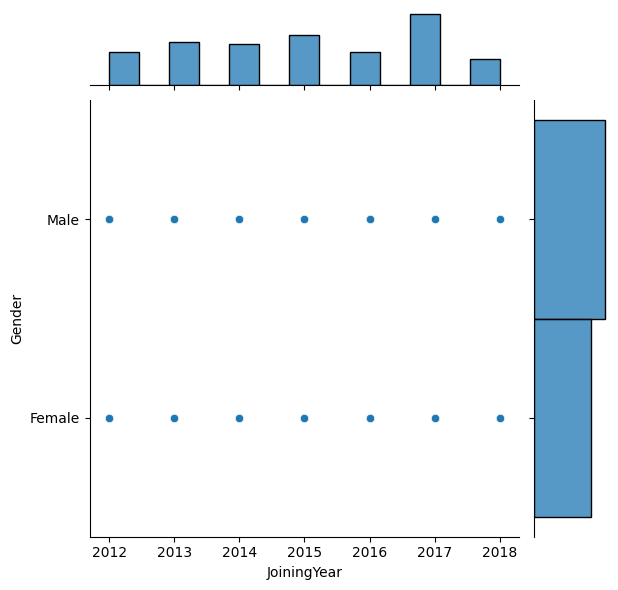

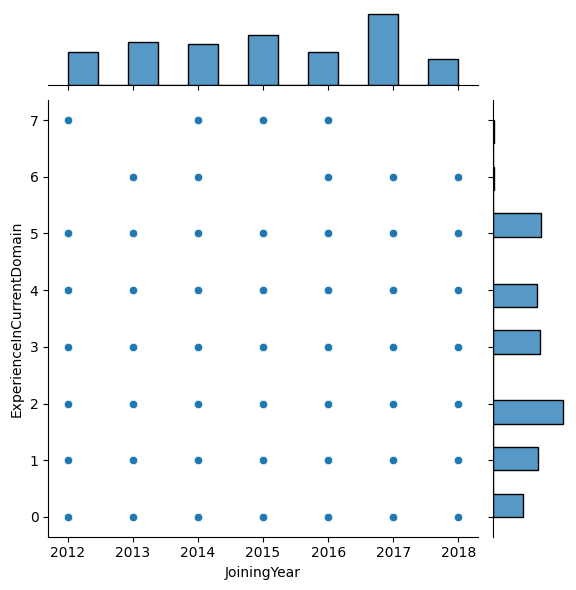

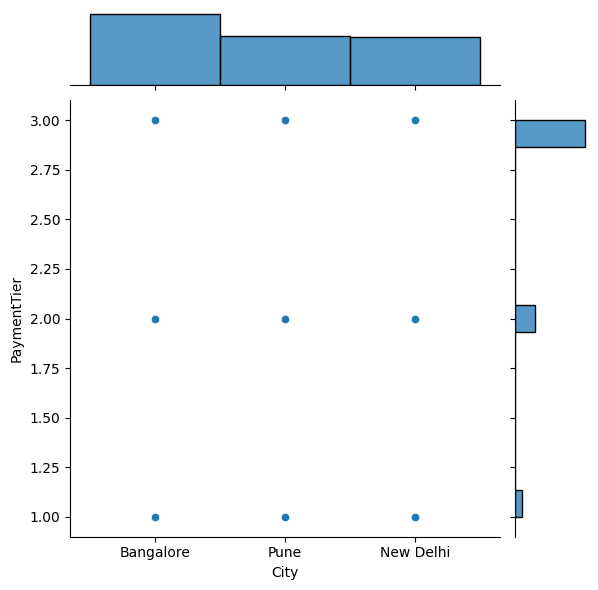

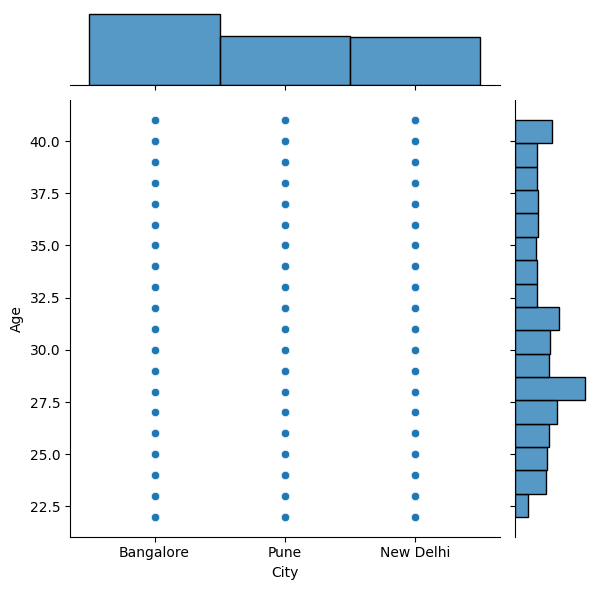

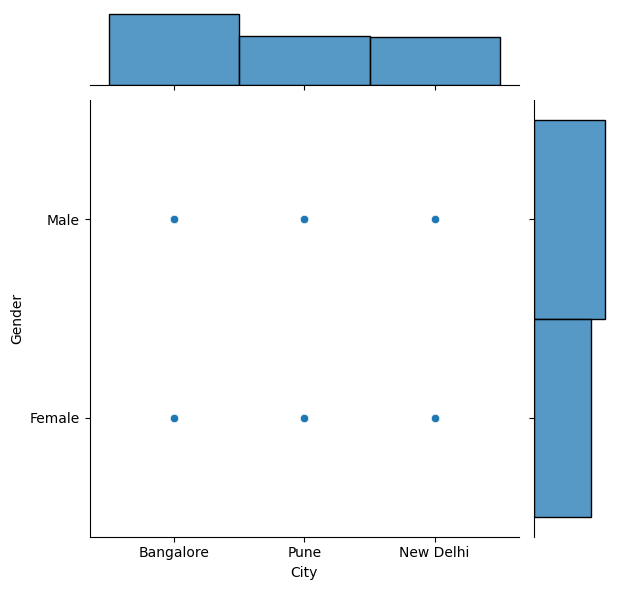

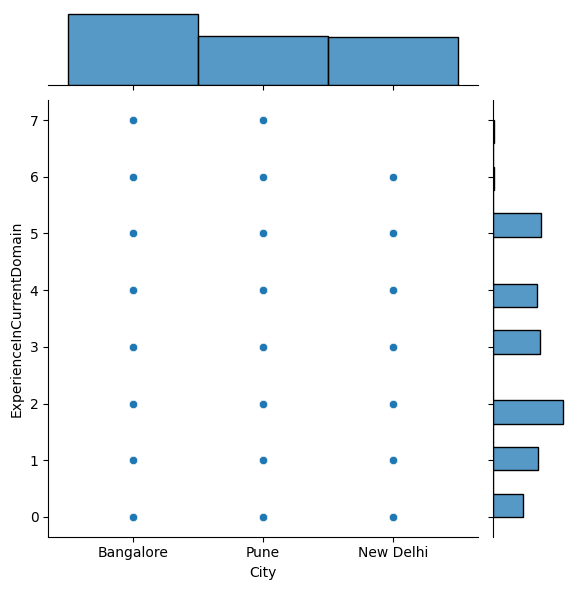

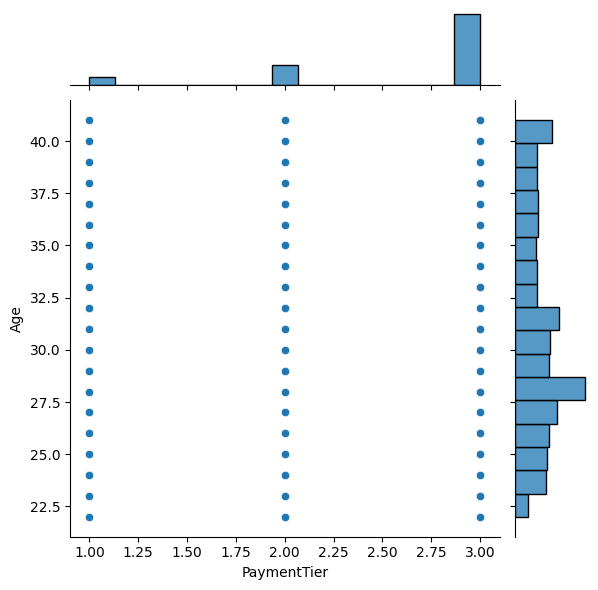

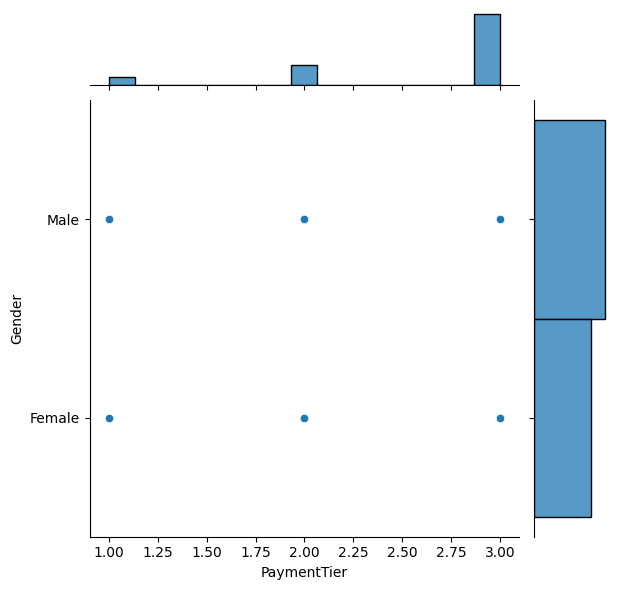

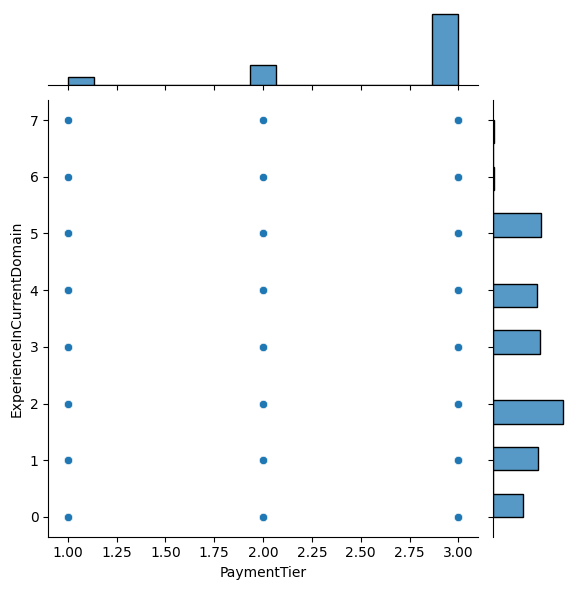

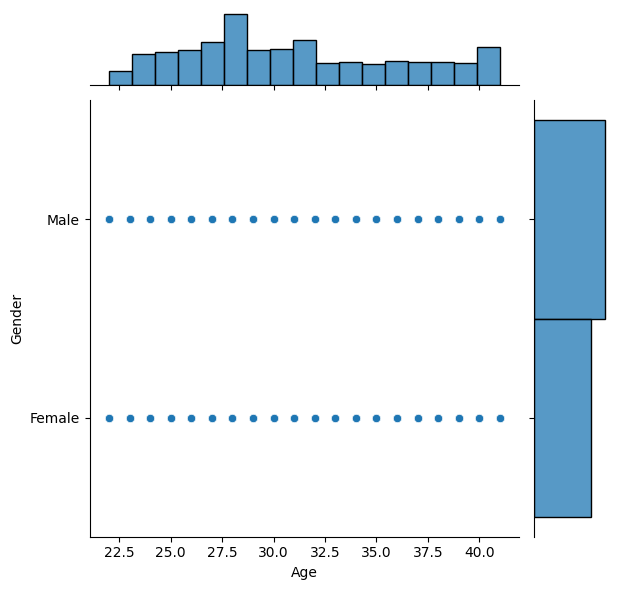

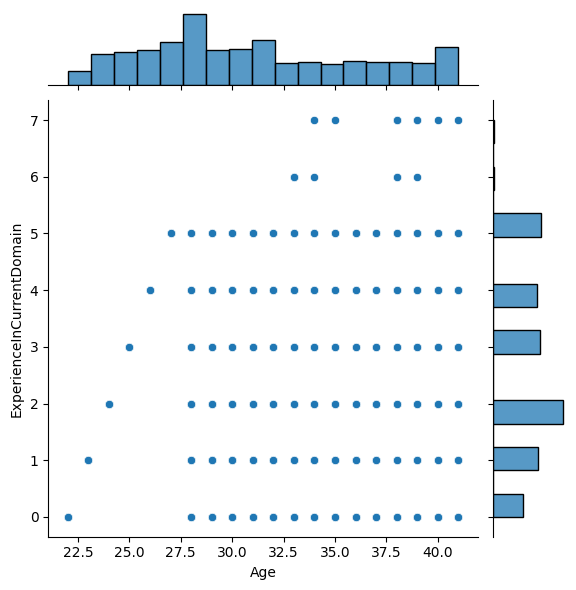

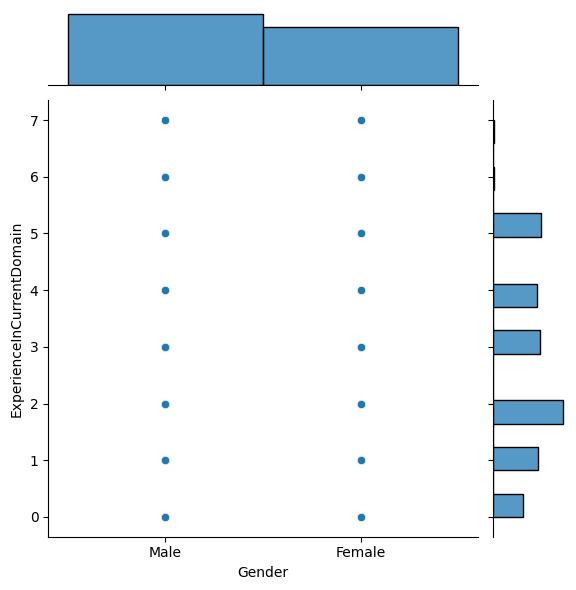

In [194]:
for feat1, feat2 in combinations:
    sns.jointplot(x=feat1, y=feat2, data=employee)

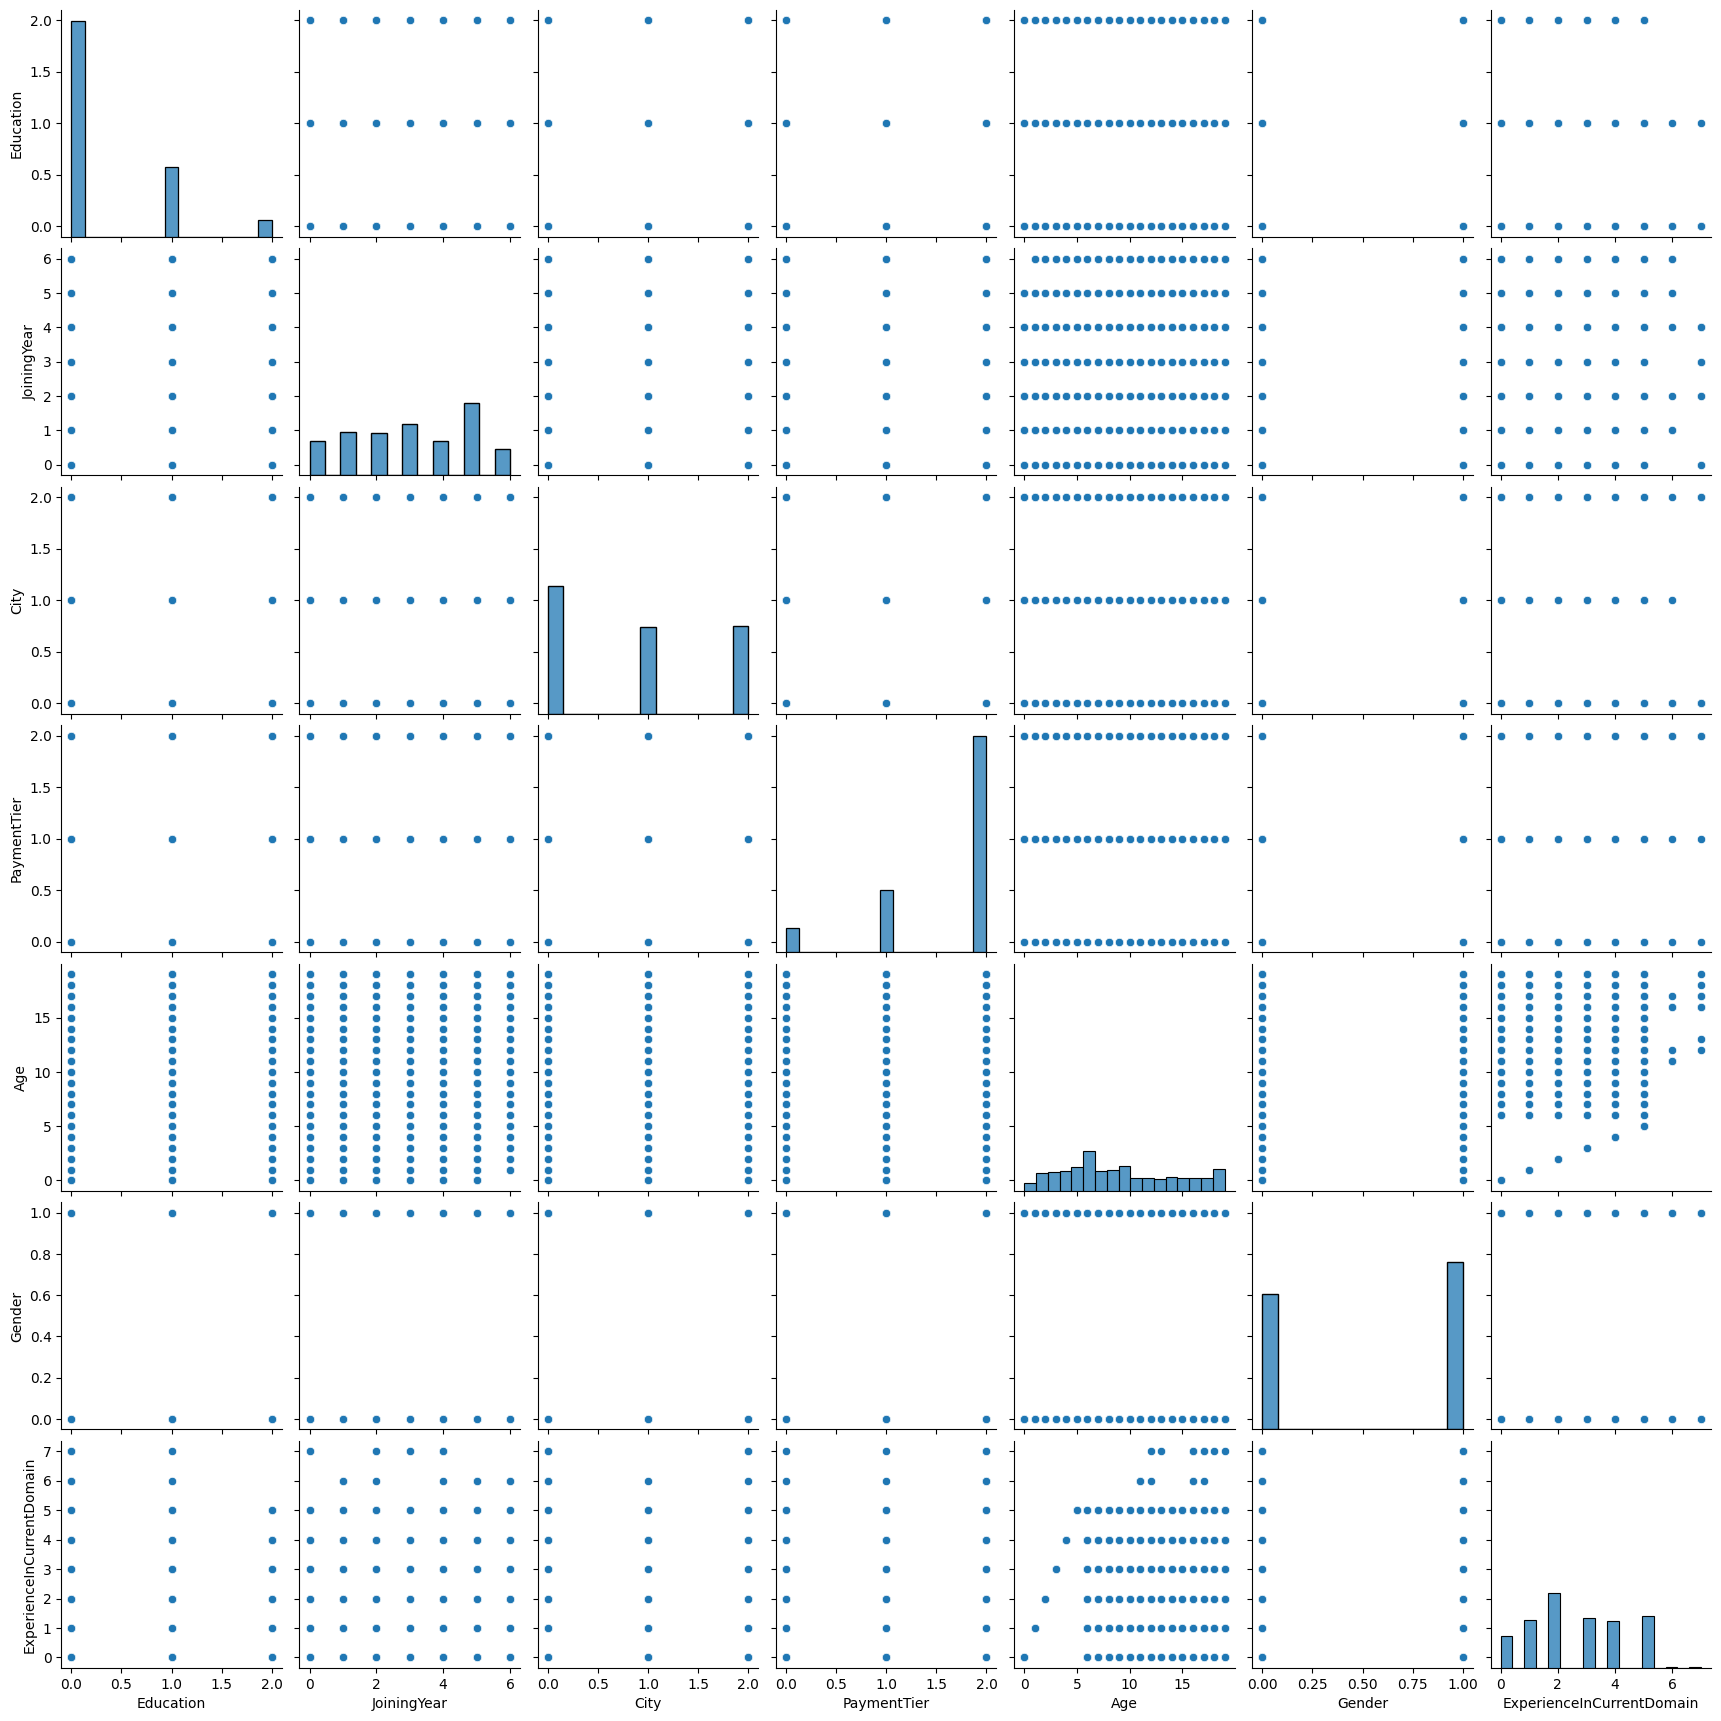

In [195]:
# Построение pairplot для всех признаков
sns.pairplot(employee_encoded_dropped)

Text(0.5, 1.0, 'Correlation Heatmap')

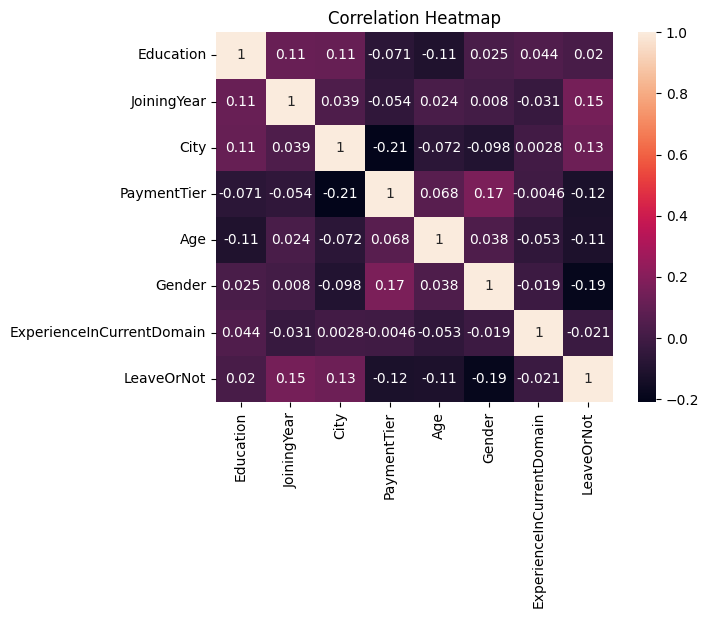

In [196]:
# Построение heatmap корреляций между признаками
sns.heatmap(employee_encoded.corr(), annot=True)
plt.title('Correlation Heatmap')